In [1]:
import torch
import json
import numpy as np
from PIL import Image
import PIL.ImageDraw as ImageDraw
import matplotlib.pyplot as plt
from IPython.display import display
from tqdm import tqdm
import os

In [2]:
def draw_bbox_image(img, name, bbox):
    draw = ImageDraw.Draw(img)

    (left, right, top, bottom) = (int(bbox['x']), int(bbox['x']+bbox['w']),int(bbox['y']), int(bbox['y']+bbox['h']))
    draw.text((left, top), name, fill=(255,0,0,128))
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
               (left, top)],
              width=3,
              fill='red')

#### Annotation inspection

In [3]:
TrainLabelFile = '/data/xyao/sg_dataset/sg_train_annotations.json'
TrainImageDir = '/data/xyao/sg_dataset/sg_train_images'

In [4]:
with open(TrainLabelFile,'r') as f:
    TrainLabel = json.load(f)
print(len(TrainLabel), TrainLabel[0].keys())
print(len(TrainLabel[0]['objects']), TrainLabel[0]['objects'][0],"\n", TrainLabel[0]['objects'][-1])
print(TrainLabel[0]['filename'])

4000 dict_keys(['relationships', 'photo_id', 'height', 'width', 'objects', 'filename'])
19 {'attributes': [{'text': ['car', 'is', 'gray'], 'attribute': 'gray'}, {'text': ['car', 'is', 'moving'], 'attribute': 'moving'}, {'text': ['car', 'is', 'shiny'], 'attribute': 'shiny'}], 'names': ['car'], 'bbox': {'y': 346.0, 'x': 541.0, 'w': 319.0, 'h': 128.0}} 
 {'attributes': [{'text': ['car', 'is', 'silver'], 'attribute': 'silver'}], 'names': ['car'], 'bbox': {'y': 358.0, 'x': 849.0, 'w': 172.0, 'h': 88.0}}
5526173107_447a4419bf_b.jpg


#### Viz ground truth bbox

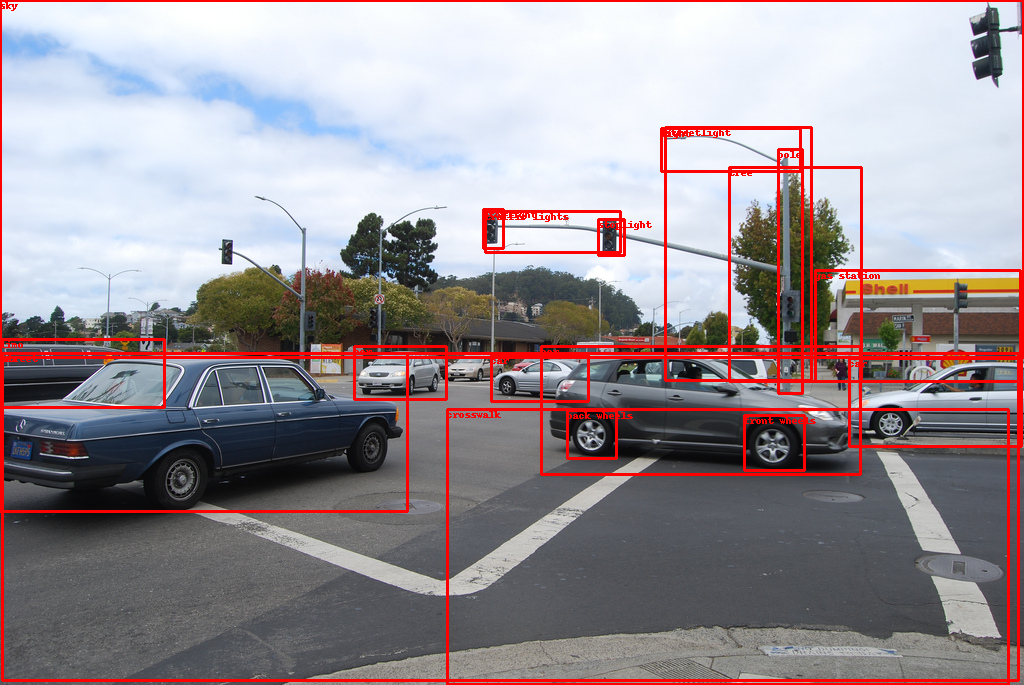

In [5]:
current_image_dict = TrainLabel[0]
with Image.open(os.path.join(TrainImageDir, current_image_dict ['filename'])) as im:
    for obj in current_image_dict ['objects']:
        draw_bbox_image(im,  obj['names'][0], obj['bbox'])
    display(im)

#### Save ground truth bbox

In [59]:
SaveBboxDir = '/data/xyao/sg_dataset/bbox_sg_train_images/'
for current_image_dict in tqdm(TrainLabel):
    with Image.open(os.path.join(TrainImageDir, current_image_dict ['filename'])) as im:
        for obj in current_image_dict ['objects']:
            draw_bbox_image(im,  obj['names'][0], obj['bbox'])
        im.save(os.path.join(SaveBboxDir, current_image_dict ['filename']))

100%|██████████| 4000/4000 [02:03<00:00, 32.28it/s]


### Run yolov5

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/xyao/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-10-7 torch 1.8.0 CUDA:0 (GeForce RTX 2080 Ti, 11019.4375MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


In [22]:
yoloSaveDir = '/data/xyao/sg_dataset/yolo_sg_train_images/'
model.conf = 0.3
for current_image_dict in tqdm(TrainLabel):
    results = model(os.path.join(TrainImageDir, current_image_dict ['filename']))
    results.save(yoloSaveDir) # print save show


  0%|          | 0/4000 [00:00<?, ?it/s]Saved 1 image to /data/xyao/sg_dataset/yolo_sg_train_images
Saved 1 image to /data/xyao/sg_dataset/yolo_sg_train_images
  0%|          | 2/4000 [00:00<04:05, 16.30it/s]Saved 1 image to /data/xyao/sg_dataset/yolo_sg_train_images
Saved 1 image to /data/xyao/sg_dataset/yolo_sg_train_images
Saved 1 image to /data/xyao/sg_dataset/yolo_sg_train_images
  0%|          | 5/4000 [00:00<03:00, 22.16it/s]Saved 1 image to /data/xyao/sg_dataset/yolo_sg_train_images
Saved 1 image to /data/xyao/sg_dataset/yolo_sg_train_images
Saved 1 image to /data/xyao/sg_dataset/yolo_sg_train_images
  0%|          | 8/4000 [00:00<03:14, 20.51it/s]Saved 1 image to /data/xyao/sg_dataset/yolo_sg_train_images
Saved 1 image to /data/xyao/sg_dataset/yolo_sg_train_images
Saved 1 image to /data/xyao/sg_dataset/yolo_sg_train_images
  0%|          | 11/4000 [00:00<03:33, 18.65it/s]Saved 1 image to /data/xyao/sg_dataset/yolo_sg_train_images
Saved 1 image to /data/xyao/sg_dataset/yolo_sg_

In [ ]:
'/data/xyao/sg_dataset/sg_train_images/5526173107_447a4419bf_b.jpg'

In [12]:
!python yolov5/detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source '/data/xyao/sg_dataset/sg_train_images' --device '0,1,2,3' --visualize

detect: weights=['yolov5s.pt'], source=/data/xyao/sg_dataset/sg_train_images/5526173107_447a4419bf_b.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0,1,2, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=True, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-498-g57ce73c torch 1.8.0 CUDA:0 (GeForce RTX 2080 Ti, 11019.4375MB)
                                        CUDA:1 (GeForce RTX 2080 Ti, 11019.4375MB)
                                        CUDA:2 (GeForce RTX 2080 Ti, 11019.4375MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
image 1/1 /data/xyao/sg_dataset/sg_train_images/5526173107_447a4419bf_b.jpg: Saving yolov5/runs/detect/exp2/5526173107_447a4419bf_b/stage0_Focus_features.png... (32/32)
Saving yolov5/runs/detect/exp2/5526173107_